In [1]:
from roulette import Roulette
from core import *
from simulations_core import *
from simulations_plots_core import *
roulette = Roulette()

In [4]:
def paroli_betting(goal_money_won):
    start = 1
    money_history = []
    money = 0
    streak = 0
    bet = start
    while money < goal_money_won:
        if money < -1000:
            return money_history
        
        prev_money = money 
        money += roulette.make_even_bet(bet)
        money_history.append(money)
        if money < prev_money:
            streak = 0
            bet = start
        else:
            streak += 1
            bet *= 2
            if streak == 3:
                streak = 0
                bet = start

    return money_history

In [5]:
money_histories = simulate_different_goal_money(
                    betting_type = paroli_betting, 
                    goal_money_list = [10, 100, 500, 1000], 
                    number_histories = 1000)

In [9]:
def plot_successful_bets(money_histories, goal, title='Successful bets'):
    num_bets = ['Successful' if money_history[-1] >= goal else 'Unsuccessful' for money_history in money_histories]
    plt.hist(num_bets)
    plt.title(title)
    plt.show()

In [19]:
successful_histories = dict()

In [24]:
for goal in [10, 100, 500, 1000]:
    successful_histories[goal] = [money_history for money_history in money_histories[goal] if money_history[-1] >= goal]

## Analysis when the goal is to win 10 units

In [23]:
len(successful_histories[10])

775

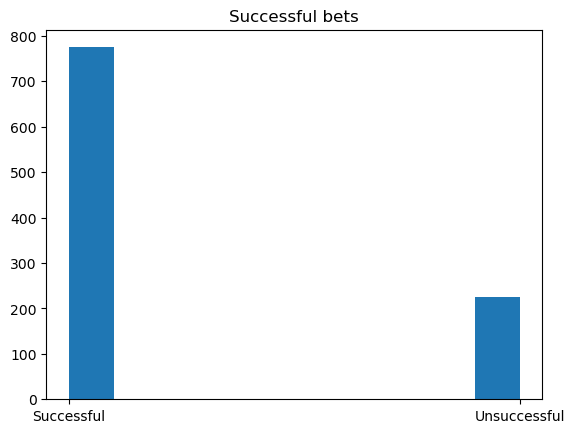

In [11]:
plot_successful_bets(money_histories[10], 10)

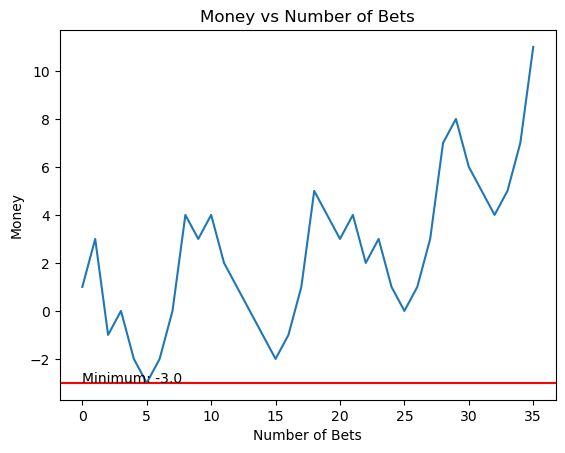

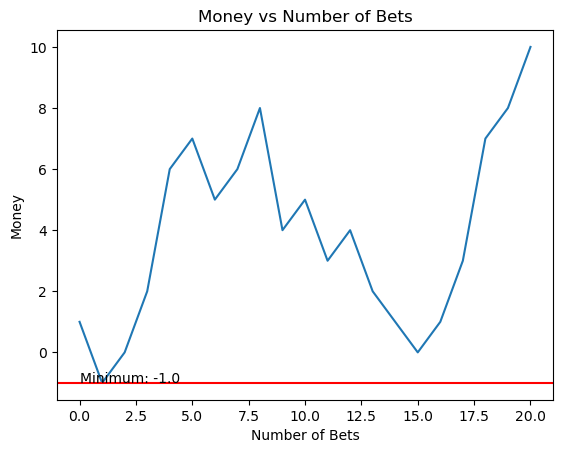

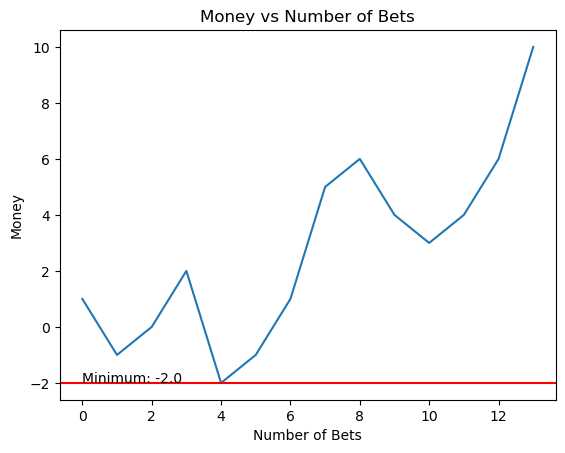

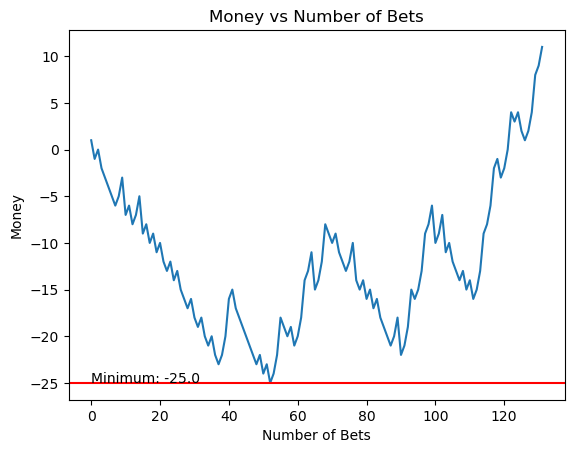

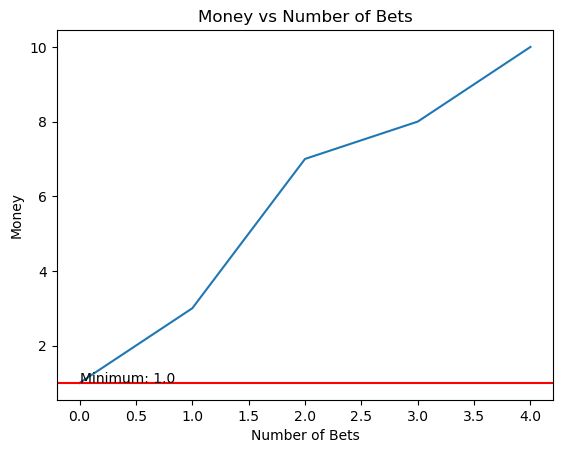

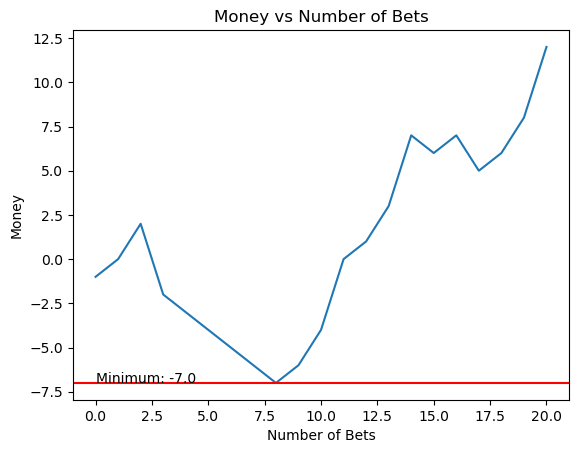

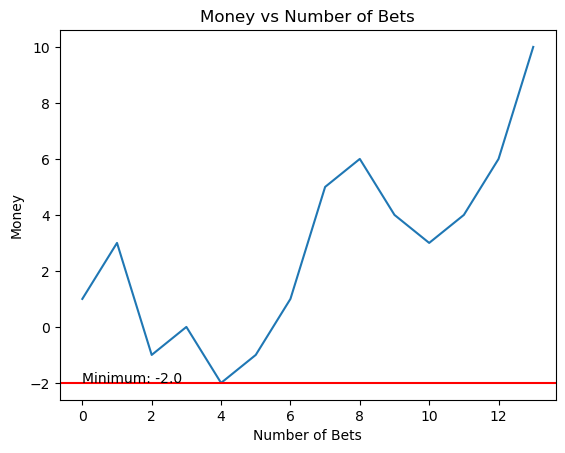

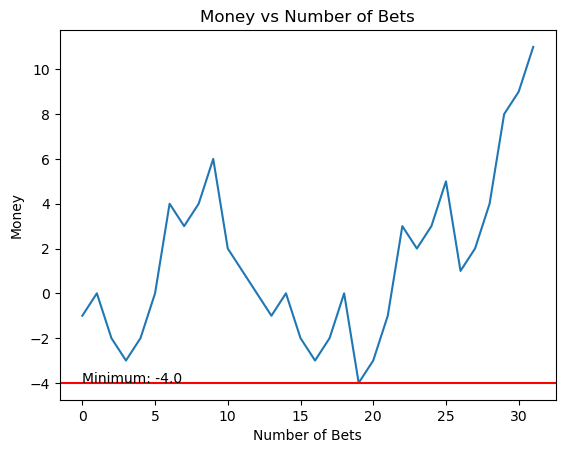

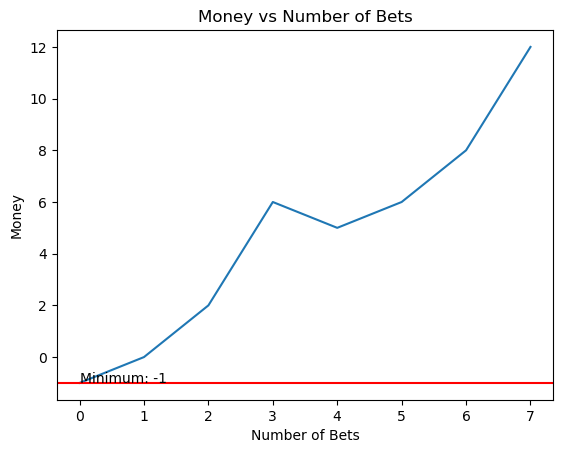

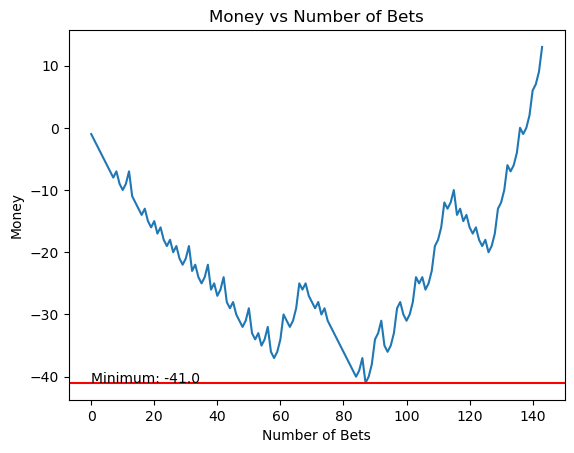

In [25]:
plot_money_histories(successful_histories, 10)

## Analysis when the goal is to win 100 units

In [29]:
len(successful_histories[100])

106

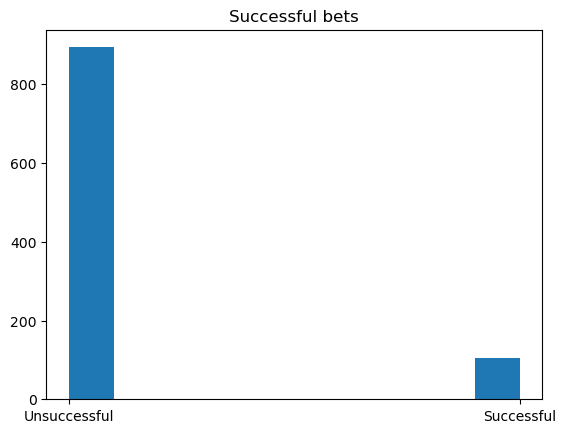

In [12]:
plot_successful_bets(money_histories[100], 100)

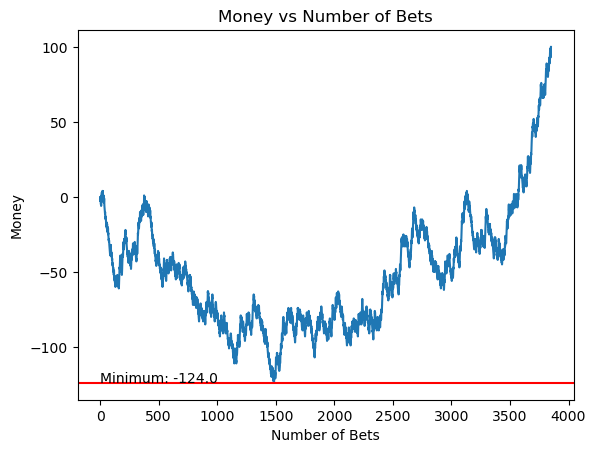

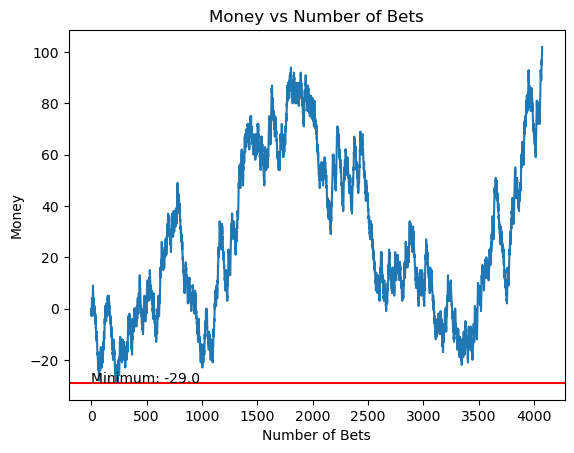

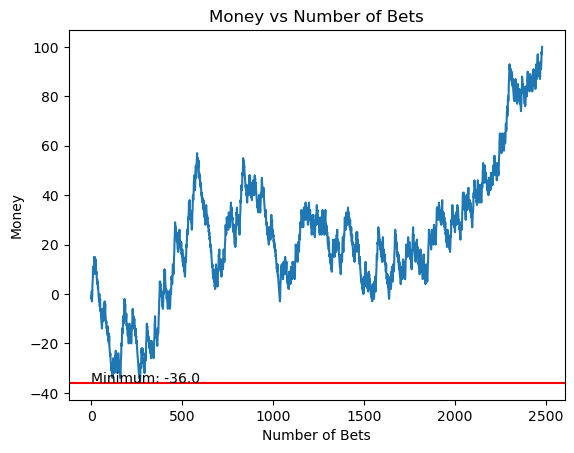

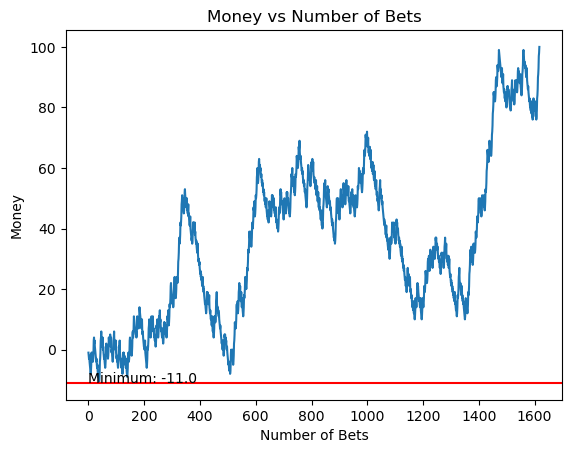

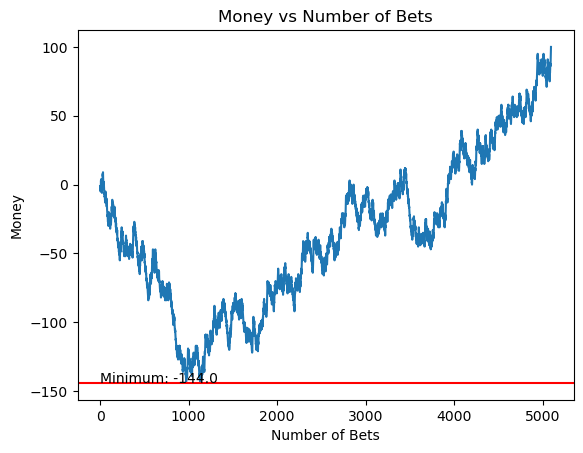

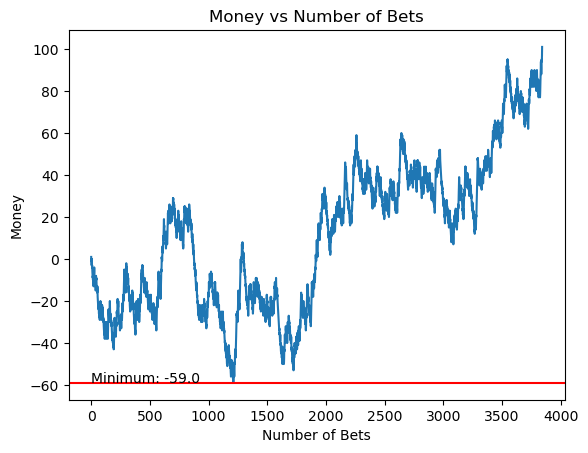

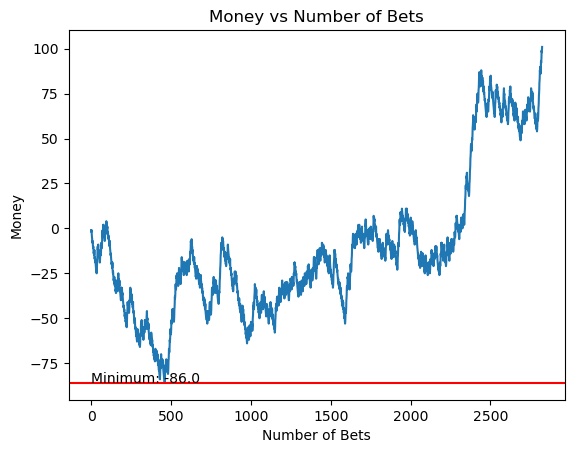

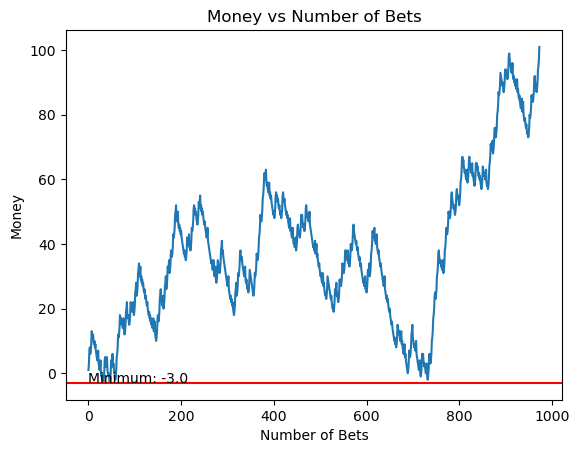

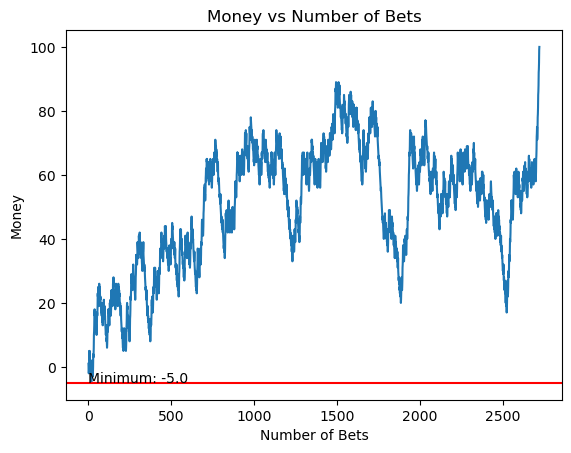

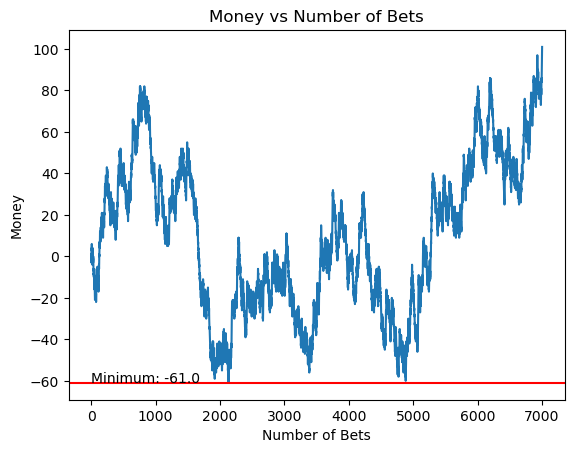

In [26]:
plot_money_histories(successful_histories, 100)

## Analysis when the goal is to win 500 units

In [31]:
len(successful_histories[500])

0

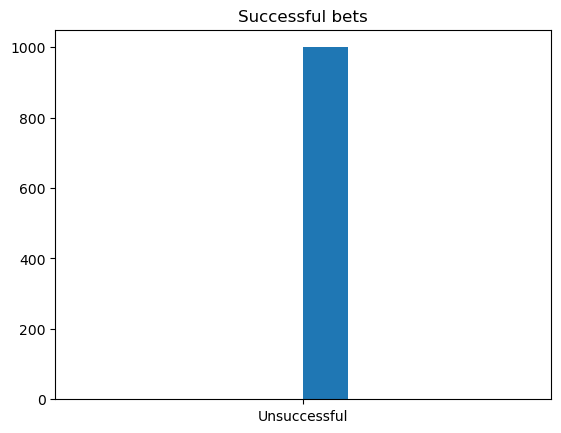

In [13]:
plot_successful_bets(money_histories[500], 500)

In [27]:
plot_money_histories(successful_histories, 500)

## Analysis when the goal is to win 1000 units

In [30]:
len(successful_histories[1000])

0

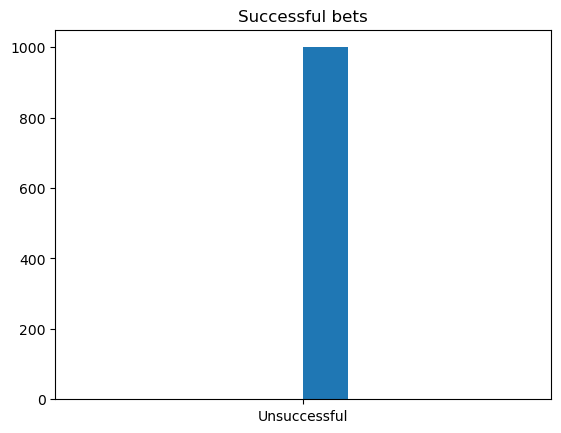

In [14]:
plot_successful_bets(money_histories[1000], 1000)

In [28]:
plot_money_histories(successful_histories, 1000)